In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dogs_of_Zurich/A20151001hundehalter.csv')
df

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,128471,21-30,w,8.0,83.0,Tibetan Spaniel,NaN,NaN,NaN,K,2007,w,braun/beige
6976,128471,21-30,w,8.0,83.0,Rottweiler,NaN,NaN,NaN,I,2014,m,schwarz/rot
6977,128479,51-60,w,6.0,63.0,Lagotto Romagnolo,Mischling,NaN,NaN,I,2007,m,weiss/grau
6978,128482,21-30,w,9.0,91.0,Yorkshire Terrier,NaN,NaN,NaN,K,2015,w,schwarz/braun/grau


**What are the top three dog breeds ('RASSE1') per each owner age-group ('ALTER')?**

In [6]:
#slice 'age' and 'breed' columns from df
df_slice = df[['ALTER', 'RASSE1']]

df_slice

df.ALTER.unique()

array(['51-60', '61-70', '41-50', '71-80', '31-40', '81-90', '21-30',
       '91-100', nan, '11-20'], dtype=object)

**Create a new df composed of the breed and it's count for a specified age-group**

In [4]:
fortyone = df_slice[df_slice.ALTER == '41-50']

value_counts = fortyone['RASSE1'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_breed', 'count'] # change column names
df_value_counts

df_value_counts = df_value_counts.head(3)
df_value_counts

,unique_breed,count
0,Mischling klein,125
1,Labrador Retriever,109
2,Chihuahua,97


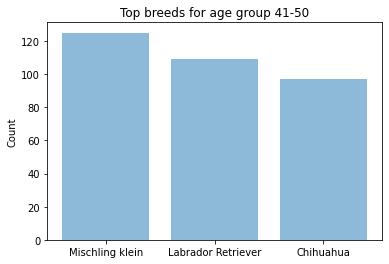

In [5]:
#plot bar chart
objects = df_value_counts['unique_breed']
y_pos = np.arange(len(objects))
performance = df_value_counts['count']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Top breeds for age group 41-50')

plt.show()

**Do older owners tend to posses smaller-breed dogs?**
It is hard to say by comparing oldest age-group v youngest age-group breed-count data.
The 'breed' data must be transformed into 'size catergories' then compared with age-group to better answer. 

In [7]:
oldest = df_slice[df_slice.ALTER == '91-100']

value_counts = oldest['RASSE1'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_breed', 'count'] # change column names
df_value_counts

df_value_counts = df_value_counts.head(3)
df_value_counts

,unique_breed,count
0,Pudel,3
1,Mischling klein,3
2,Yorkshire Terrier,2


In [9]:
youngest = df_slice[df_slice.ALTER == '11-20']

value_counts = youngest['RASSE1'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_breed', 'count'] # change column names
df_value_counts

df_value_counts = df_value_counts.head(3)
df_value_counts

,unique_breed,count
0,Chihuahua,10
1,Yorkshire Terrier,4
2,Französische Bulldogge,4
